In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

ENE_PATH = "6W3C2_dephos_50ns.ene" 
df = pd.read_csv(
    ENE_PATH,
    sep=r"\s+",      # whitespace separated
    engine="python",
    comment="#",     # ignore comment lines
    header=None      # no header row
)

print("Shape:", df.shape)
df.head()

Shape: (41667, 10)


,0,1,2,3,4,5,6,7,8,9
0,0.0,-307148.693,-307162.288,0.0000,0.000000,13.594922,-4526.11592,-1545.780,932182.290,0.000
1,1.2,-249193.737,-307494.359,58073.6599,0.000037,226.962934,-4521.27917,32.826,932243.302,300.533
2,2.4,-249197.293,-307349.572,57568.7964,0.000231,583.482260,-4518.50908,-81.729,933626.898,297.920
3,3.6,-249192.447,-307823.866,57764.1800,0.000483,867.238823,-4511.38413,-138.483,933084.376,298.931
4,4.8,-249201.534,-308016.024,57754.2453,0.000803,1060.245060,-4528.46974,34.371,931931.442,298.880


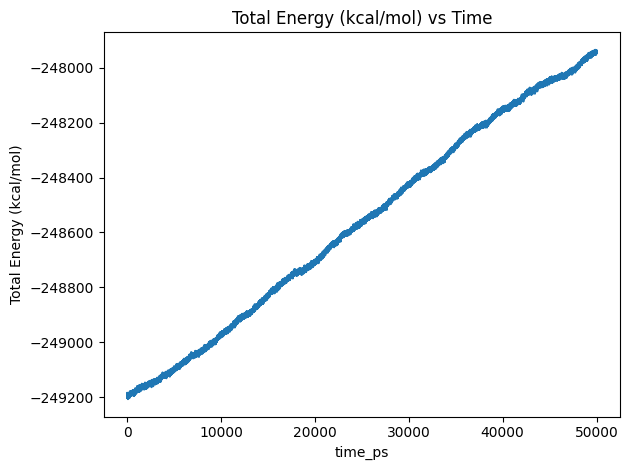

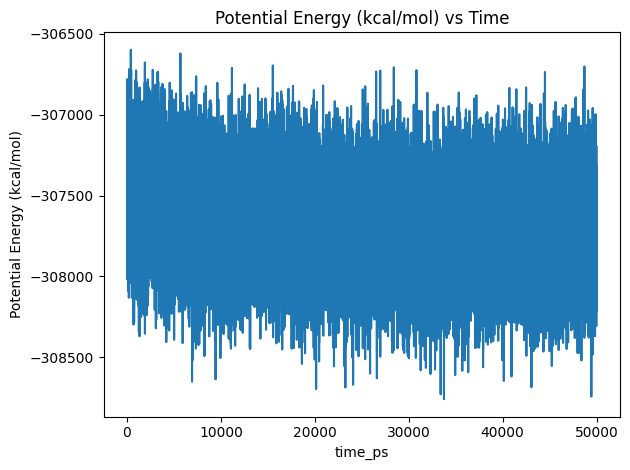

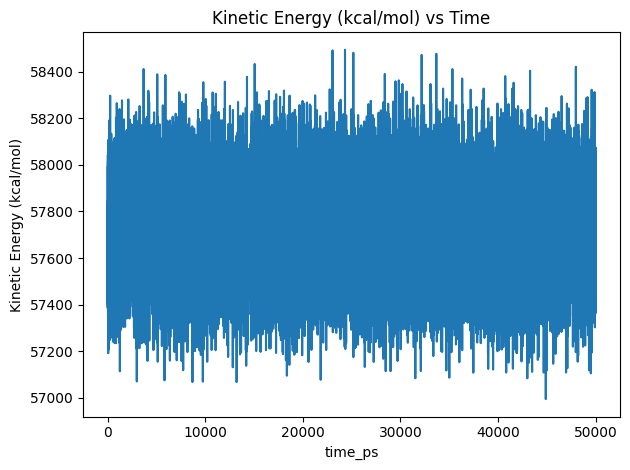

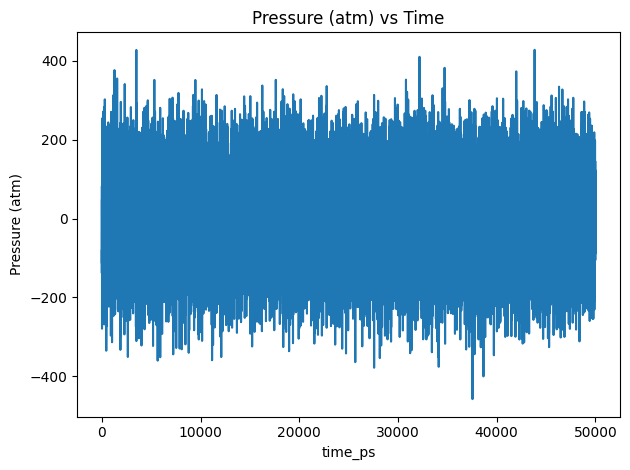

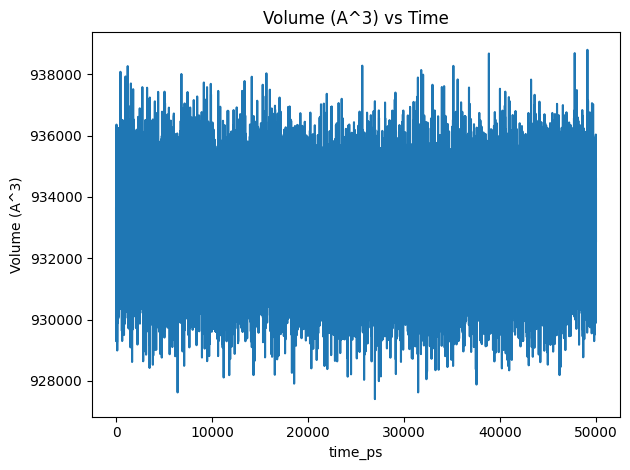

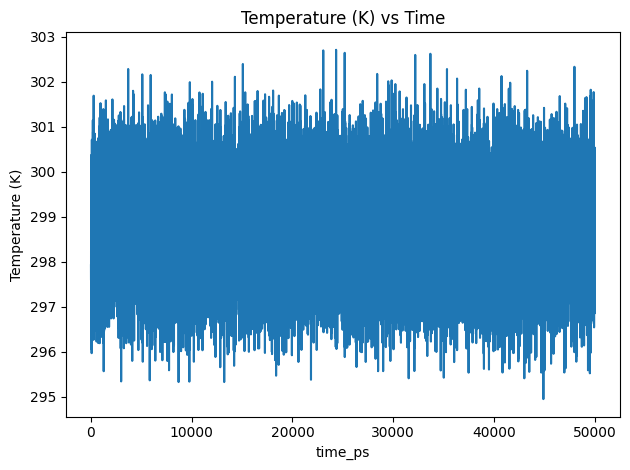

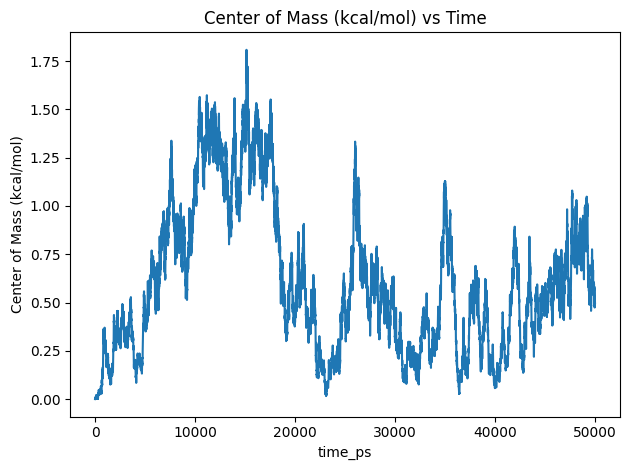

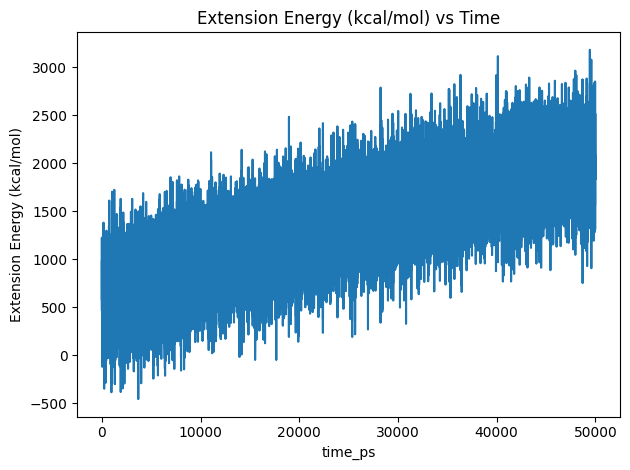

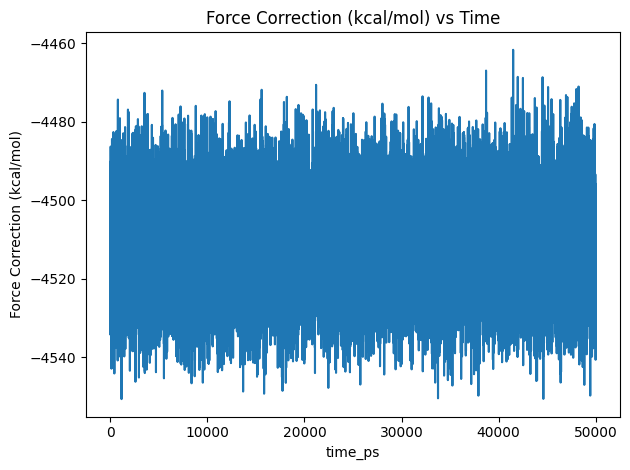

In [2]:
base_names = ["time_ps", "total_E", "potential_E", "kinetic_E",
              "com_E", "extension_E", "force_correction", "pressure", "volume", "temperature"]
n = df.shape[1]
cols = base_names[:n] + [f"col{i}" for i in range(len(base_names), n)]
df.columns = cols[:n]
df = df[df["time_ps"] > 2]

os.makedirs("energy_out", exist_ok=True)
df.to_csv("energy_out/energy_raw.csv", index=False)

def safe_plot(y, ylabel, fname):
    if "time_ps" in df.columns and y in df.columns:
        plt.figure()
        plt.plot(df["time_ps"], df[y])
        plt.xlabel("time_ps"); plt.ylabel(ylabel); plt.title(f"{ylabel} vs Time")
        plt.tight_layout()
        plt.savefig(f"energy_out/{fname}", dpi=150)
        plt.show()

safe_plot("total_E", "Total Energy (kcal/mol)", "total_energy_vs_time.png")
safe_plot("potential_E", "Potential Energy (kcal/mol)", "potential_energy_vs_time.png")
safe_plot("kinetic_E", "Kinetic Energy (kcal/mol)", "kinetic_energy_vs_time.png")
safe_plot("pressure", "Pressure (atm)", "pressure_vs_time.png")
safe_plot("volume", "Volume (A^3)", "volume_vs_time.png")
safe_plot("temperature", "Temperature (K)", "temperature_vs_time.png")
safe_plot("com_E", "Center of Mass (kcal/mol)", "center_of_mass_vs_time.png")
safe_plot("extension_E", "Extension Energy (kcal/mol)", "extension_energy_vs_time.png")
safe_plot("force_correction", "Force Correction (kcal/mol)", "force_correction_vs_time.png")

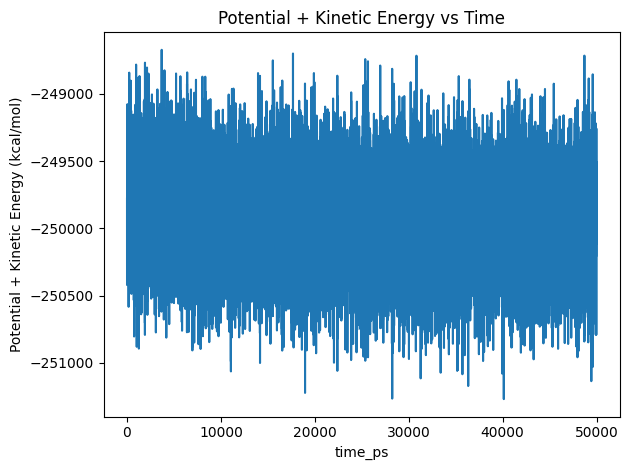

In [3]:
# Add combined potential + kinetic energy
if "potential_E" in df.columns and "kinetic_E" in df.columns:
    df["E_sum"] = df["potential_E"] + df["kinetic_E"]
    plt.figure()
    plt.plot(df["time_ps"], df["E_sum"])
    plt.xlabel("time_ps")
    plt.ylabel("Potential + Kinetic Energy (kcal/mol)")
    plt.title("Potential + Kinetic Energy vs Time")
    plt.tight_layout()
    plt.savefig("energy_out/potential_plus_kinetic_energy_vs_time.png", dpi=150)
    plt.show()
